# Load the MLFlow model locally and try predictions

## Prerequisites

1. You need to have run successfully the training notebook related to this model, available in this same folder, where at the end of the notebook, after training the model, it downloads the 'artifacts' with the MLFlow model folder ("./artifact_downloads/outputs/mlflow-model").

2. Create a conda environment with the 'conda.yaml' file provided within the "mlflow-model" folder, doing like the following:
     1. if you are running this notebook on a windows machine, Please remove "Pycocotools" and "recordclass" lines from conda.yaml and have c++ build tools( https://visualstudio.microsoft.com/visual-cpp-build-tools/ ) installed before running the below steps

   1. (base) /> conda env create --file conda.yaml --name automl-model-image-object-detection-env
   
   1. (base) /> conda activate automl-model-image-object-detection-env
   
   1. (automl-model-image-object-detection-env) /> conda install jupyter nb_conda

3. Run Jupyter and make sure you are using the related 'automl-model-image-object-detection-env' Kernel.

4. Run this notebook.

If the MLFlow model files were downloaded successfully by the training notebook, you should see the files here.

In [1]:
import os

# Local dir where you have downloaded and saved the artifacts
local_dir = "./artifact_downloads"

mlflow_model_dir = os.path.join(local_dir, "outputs", "mlflow-model")

# Show the contents of the MLFlow model folder
os.listdir(mlflow_model_dir)

# You should see a list of files such as the following:
# ['artifacts', 'conda.yaml', 'MLmodel', 'python_env.yaml', 'python_model.pkl', 'requirements.txt']

FileNotFoundError: [WinError 3] The system cannot find the path specified: './artifact_downloads\\outputs\\mlflow-model'

### Load the test data into a Pandas DataFrame

Load some test images into a Pandas DataFrame in order to try some predictions with it.

In [20]:
import os

# Change to a different location if you downloaded data at a different location
dataset_parent_dir = "./drawings"
dataset_name = "test_set/with_doors"
#os.listdir(os.path.join(dataset_parent_dir, dataset_name, "cropped"))
test_image_paths = []
for file in os.listdir(os.path.join(dataset_parent_dir, dataset_name, "")):
    test_image_paths.append(os.path.join(dataset_parent_dir, dataset_name, "", file))
   

In [25]:

#skip the first item
test_image_paths = test_image_paths[1:]

test_image_paths


['./drawings/test_set/with_doors/Rinker_047.jpg',
 './drawings/test_set/with_doors/Rinker_048.jpg',
 './drawings/test_set/with_doors/Rinker_061.jpg',
 './drawings/test_set/with_doors/Rinker_062.jpg',
 './drawings/test_set/with_doors/Rinker_070.jpg',
 './drawings/test_set/with_doors/Rinker_071.jpg']

In [26]:
import pandas as pd
import base64


def read_image(image_path):
    with open(image_path, "rb") as f:
        return f.read()


test_df = pd.DataFrame(
    data=[
        base64.encodebytes(read_image(image_path)).decode("utf-8")
        for image_path in test_image_paths
    ],
    columns=["image"],
)
test_df.shape

(6, 1)

## Load the best model in memory

Load the model using MLflow flavor. Check MLmodel under the downloaded folder (artifact_downloads/outputs/mlflow-model). For this particular example (and for AutoML for Images scenario), MLmodel file will describe python_function flavor. We show how to load model using pyfunc flavor. For more information on MLflow flavors, visit: https://www.mlflow.org/docs/latest/models.html#storage-format

Loading the models locally assume that you are running the notebook in an environment compatible with the model. The list of dependencies that is expected by the model is specified in the MLFlow model produced by AutoML (in the 'conda.yaml' file within the mlflow-model folder).

In [27]:
import mlflow.pyfunc

In [6]:
!pip install azureml-automl-dnn-vision

  Obtaining dependency information for azureml-automl-dnn-vision from https://files.pythonhosted.org/packages/78/02/b3a1dfda0a1e05fdc9349d99a1e46451b6d85c9b358a4859404c77560a1f/azureml_automl_dnn_vision-1.53.2-py3-none-any.whl.metadata
  Obtaining dependency information for azureml-automl-core~=1.53.2 from https://files.pythonhosted.org/packages/fe/39/014c994acd34b3360e4d8352a7ec054061ebd808a6a75156643164c2ab96/azureml_automl_core-1.53.2-py3-none-any.whl.metadata
  Obtaining dependency information for azureml-dataset-runtime~=1.53.0 from https://files.pythonhosted.org/packages/7b/81/d73ae6369d7c5de9922ac82ba3c61284c35251ffbfa000166f8321326d87/azureml_dataset_runtime-1.53.0-py3-none-any.whl.metadata
  Using cached azureml_dataset_runtime-1.53.0-py3-none-any.whl.metadata (1.2 kB)
  Obtaining dependency information for azureml-core~=1.53.0 from https://files.pythonhosted.org/packages/e5/da/ed67a11a1baa8dff268ce71965fb936cd39e244ddd82134c3325f89fa7a8/azureml_core-1.53.0-py3-none-any.whl.me

  error: subprocess-exited-with-error
  
  × Building wheel for pycocotools (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [17 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-38
      creating build\lib.win-amd64-cpython-38\pycocotools
      copying pycocotools\coco.py -> build\lib.win-amd64-cpython-38\pycocotools
      copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-38\pycocotools
      copying pycocotools\mask.py -> build\lib.win-amd64-cpython-38\pycocotools
      copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-38\pycocotools
      running build_ext
      Compiling pycocotools/_mask.pyx because it changed.
      [1/1] Cythonizing pycocotools/_mask.pyx
      C:\Users\anildwa\AppData\Local\Temp\pip-build-env-xmkytonj\overlay\Lib\site-packages\Cython\Compiler\Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3s

In [28]:
# Way #1: Get the MLFlow model from the downloaded MLFlow model files

pyfunc_model = mlflow.pyfunc.load_model(mlflow_model_dir)

2023/10/11 23:03:07 WARNING mlflow.pyfunc: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - asttokens (current: 2.4.0, required: asttokens==2.2.1)
 - azure-core (current: 1.29.4, required: azure-core==1.27.1)
 - azure-identity (current: 1.14.1, required: azure-identity==1.13.0)
 - azure-mgmt-containerregistry (current: 10.2.0, required: azure-mgmt-containerregistry==10.1.0)
 - azure-mgmt-keyvault (current: 10.2.3, required: azure-mgmt-keyvault==10.2.2)
 - azure-storage-queue (current: 12.7.3, required: azure-storage-queue==12.6.0)
 - azureml-automl-core (current: 1.53.2, required: azureml-automl-core==1.52.0.post1)
 - azureml-automl-dnn-vision (current: 1.53.2, required: azureml-automl-dnn-vision==1.52.0.post1)
 - azureml-automl-runtime (current: 1.53.2, required: azureml-automl-runtime==1.52.0.post1)
 - azureml-core (current: 1.53.0, required: azureml-core==1.52.0)
 - azureml-dataprep (current: 4.12.4, required: azureml-dataprep==

In [29]:
# Make the predictions

result = pyfunc_model.predict(test_df).to_json(orient="records")
result

/home/anildwa/miniconda3/envs/azuremlsdk/lib/python3.8/site-packages/PIL/Image.py:2896: DecompressionBombWarning: Image size (113526000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/anildwa/miniconda3/envs/azuremlsdk/lib/python3.8/site-packages/PIL/Image.py:2896: DecompressionBombWarning: Image size (115191000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/anildwa/miniconda3/envs/azuremlsdk/lib/python3.8/site-packages/PIL/Image.py:2896: DecompressionBombWarning: Image size (115236000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/anildwa/miniconda3/envs/azuremlsdk/lib/python3.8/site-packages/PIL/Image.py:2896: DecompressionBombWarning: Image size (115020000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/anildwa/miniconda3/envs/azuremlsdk/lib/python3.8/site-

Attempted to log scalar metric total_score_time_sec:
70.20264410972595
Attempted to log scalar metric per_image_avg_score_time_sec:
11.700440684954325


'[{"boxes":[{"box":{"topX":0.2449662345,"topY":0.5529049683,"bottomX":0.2580243429,"bottomY":0.5714489746},"label":"door","score":0.8326986432},{"box":{"topX":0.2449469248,"topY":0.6364161174,"bottomX":0.2584974925,"bottomY":0.6536724854},"label":"door","score":0.6455667019},{"box":{"topX":0.2454577128,"topY":0.5856140645,"bottomX":0.2579418364,"bottomY":0.6035284932},"label":"door","score":0.6288650632},{"box":{"topX":0.2454716455,"topY":0.619834849,"bottomX":0.2571610405,"bottomY":0.6374064128},"label":"door","score":0.489215523},{"box":{"topX":0.3456115359,"topY":0.6135100301,"bottomX":0.3575759888,"bottomY":0.6288478088},"label":"door","score":0.4824589491},{"box":{"topX":0.2449880691,"topY":0.572187856,"bottomX":0.2586765653,"bottomY":0.6053229268},"label":"door","score":0.3130785823},{"box":{"topX":0.2451292674,"topY":0.6018013509,"bottomX":0.2588332767,"bottomY":0.6210848999},"label":"door","score":0.3125104606},{"box":{"topX":0.2468721662,"topY":0.6661719767,"bottomX":0.2570685

## Visualize detections
Now that we have scored test images, we can visualize the bounding boxes for the first image.

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import json



def visualize_detection(sample_image, detections):
    IMAGE_SIZE = (18, 12)
    plt.figure(figsize=IMAGE_SIZE)
    img_np = mpimg.imread(sample_image)
    img = Image.fromarray(img_np.astype("uint8"))
    x, y = img.size

    fig, ax = plt.subplots(1, figsize=(15, 15))
    # Display the image
    ax.imshow(img_np)

    # draw box and label for each detection
    for detect in detections["boxes"]:
        label = detect["label"]
        box = detect["box"]
        conf_score = detect["score"]
        if conf_score > 0.6:
            ymin, xmin, ymax, xmax = (
                box["topY"],
                box["topX"],
                box["bottomY"],
                box["bottomX"],
            )
            topleft_x, topleft_y = x * xmin, y * ymin
            width, height = x * (xmax - xmin), y * (ymax - ymin)
            print(
                f"{detect['label']}: [{round(topleft_x, 3)}, {round(topleft_y, 3)}, "
                f"{round(width, 3)}, {round(height, 3)}], {round(conf_score, 3)}"
            )

            color = np.random.rand(3)  #'red'
            rect = patches.Rectangle(
                (topleft_x, topleft_y),
                width,
                height,
                linewidth=3,
                edgecolor=color,
                facecolor="none",
            )

            ax.add_patch(rect)
            plt.text(topleft_x, topleft_y - 10, label, color=color, fontsize=20)
    plt.show()

door: [3090.004, 4976.145, 164.715, 166.896], 0.833
door: [3089.761, 5727.745, 170.927, 155.307], 0.646
door: [3096.204, 5270.527, 157.475, 161.23], 0.629
door: [3609.342, 6969.704, 133.23, 132.33], 0.88
door: [5340.535, 5940.009, 142.538, 153.726], 0.876
door: [3493.258, 6972.346, 120.928, 130.196], 0.851
door: [3326.939, 6582.061, 156.929, 164.129], 0.842
door: [4356.453, 5805.692, 152.644, 131.339], 0.797
door: [3120.157, 6129.229, 119.189, 123.626], 0.733
door: [6076.135, 6016.544, 141.559, 137.409], 0.931
door: [6277.383, 6124.107, 141.639, 153.398], 0.916
door: [5904.569, 4735.075, 139.237, 101.108], 0.75
door: [6250.946, 4950.931, 182.357, 168.058], 0.691
door: [5723.78, 4736.956, 168.706, 166.904], 0.681
door: [5550.918, 6016.092, 144.859, 138.383], 0.967
door: [4890.335, 5943.729, 135.439, 142.708], 0.92
door: [4783.269, 8067.588, 1613.562, 851.886], 0.768
door: [6785.121, 6517.391, 147.247, 148.091], 0.706
door: [9863.012, 2550.802, 119.667, 119.556], 0.946
door: [9182.208, 2

<Figure size 1800x1200 with 0 Axes>

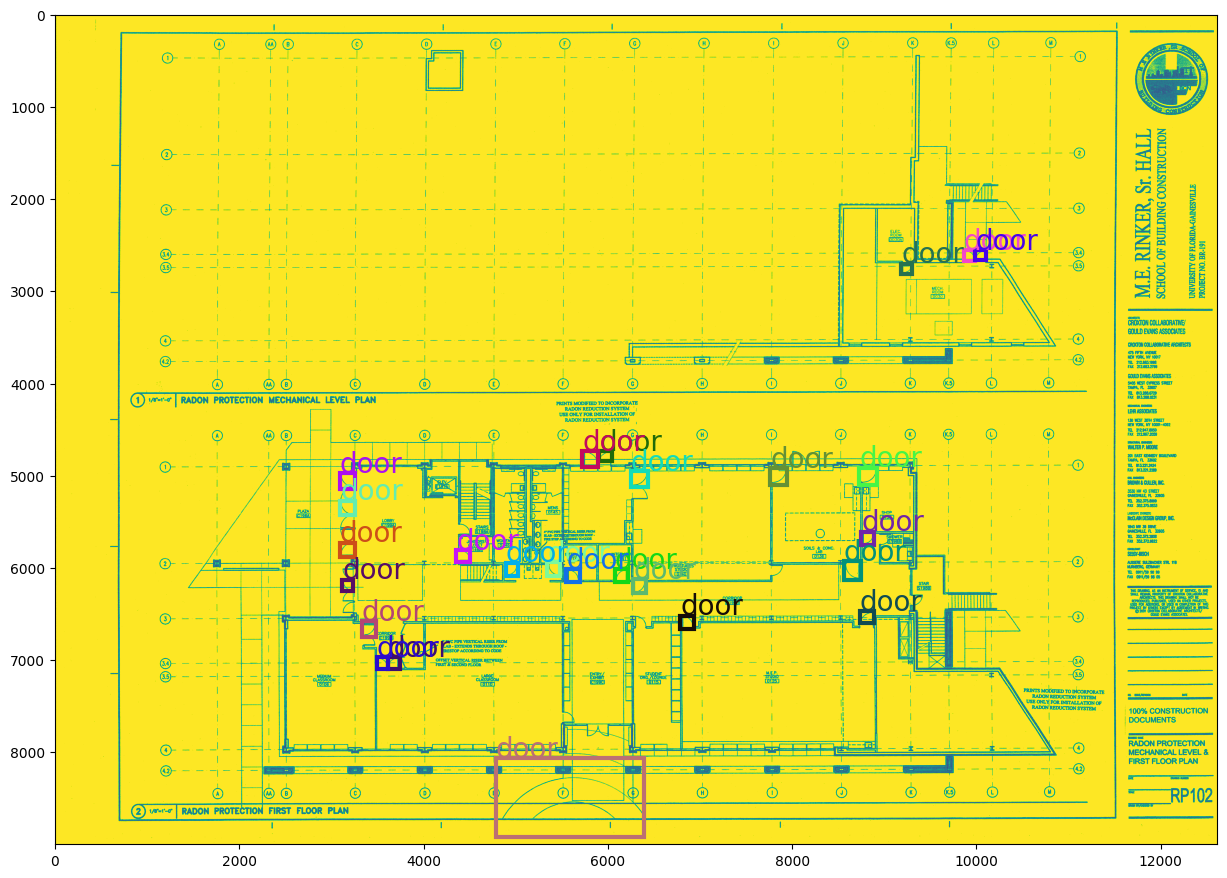

door: [2668.265, 2303.058, 124.325, 128.448], 0.81
door: [2610.894, 5960.444, 130.281, 151.243], 0.649
door: [4042.814, 2904.005, 129.422, 114.484], 0.889
door: [3461.321, 2294.65, 137.242, 147.572], 0.886
door: [4319.58, 2741.436, 138.349, 147.299], 0.852
door: [4411.455, 1291.519, 143.29, 135.529], 0.813
door: [4781.138, 1568.564, 141.122, 131.23], 0.757
door: [3674.465, 1401.72, 138.855, 151.664], 0.612
door: [4003.285, 2543.979, 148.386, 132.133], 0.604
door: [3161.036, 5203.055, 135.148, 137.151], 0.921
door: [4054.188, 5266.892, 165.804, 189.115], 0.85
door: [3657.957, 5348.651, 144.684, 151.377], 0.714
door: [3925.136, 5342.406, 133.138, 139.456], 0.685
door: [4036.555, 7445.837, 146.634, 149.178], 0.94
door: [4793.285, 7433.693, 143.119, 153.243], 0.916
door: [4417.933, 7439.621, 149.661, 152.541], 0.904
door: [3223.591, 7445.085, 131.474, 145.493], 0.869
door: [5170.487, 7441.85, 143.257, 148.808], 0.844
door: [3657.978, 7317.962, 136.107, 121.719], 0.804
door: [4397.473, 5531

<Figure size 1800x1200 with 0 Axes>

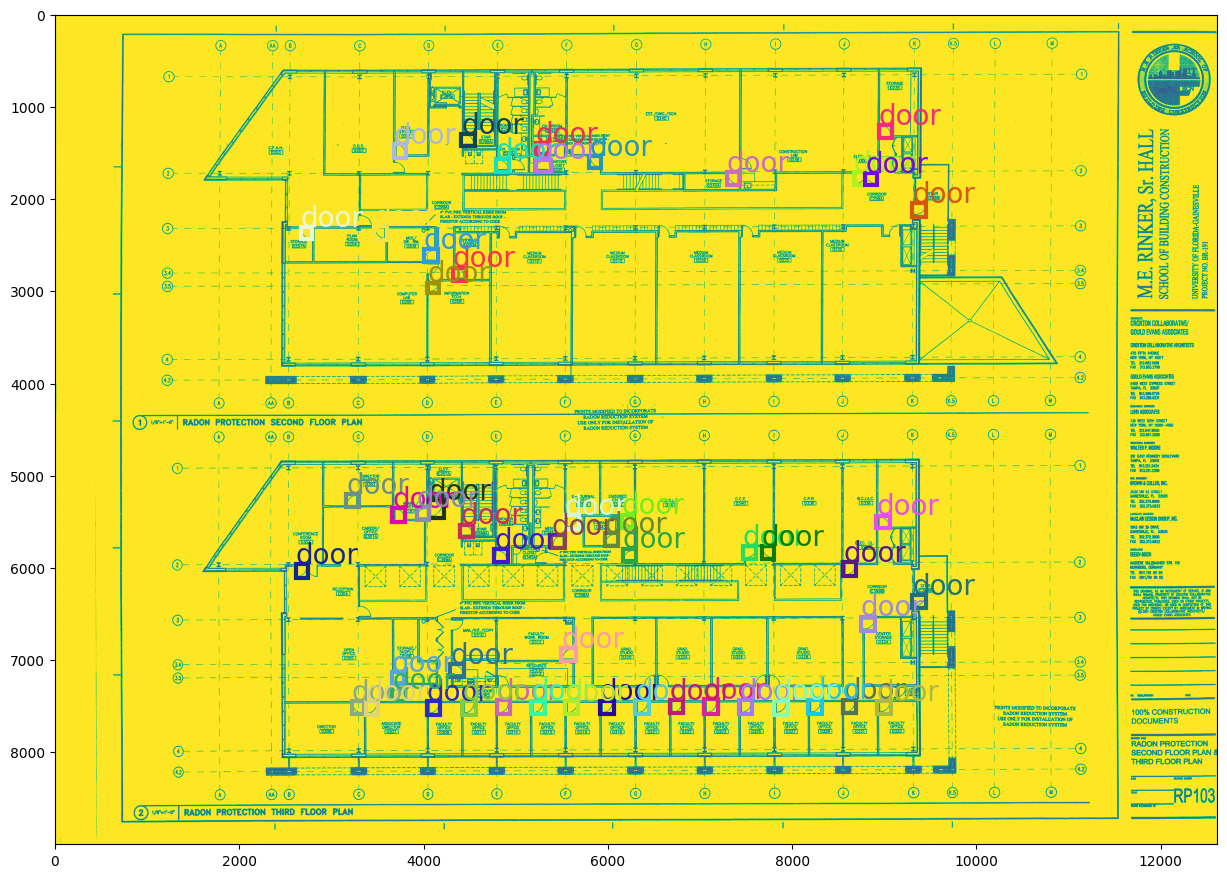

door: [3132.862, 6733.599, 144.9, 124.519], 0.71
door: [6099.696, 5284.305, 184.922, 164.3], 0.691
door: [6545.686, 6307.337, 219.17, 195.381], 0.826
door: [5600.404, 5626.753, 110.526, 126.584], 0.701
door: [6348.497, 6999.617, 159.838, 146.205], 0.61
door: [9147.979, 1759.694, 234.568, 187.602], 0.667
door: [8190.044, 5066.979, 149.251, 128.704], 0.682


<Figure size 1800x1200 with 0 Axes>

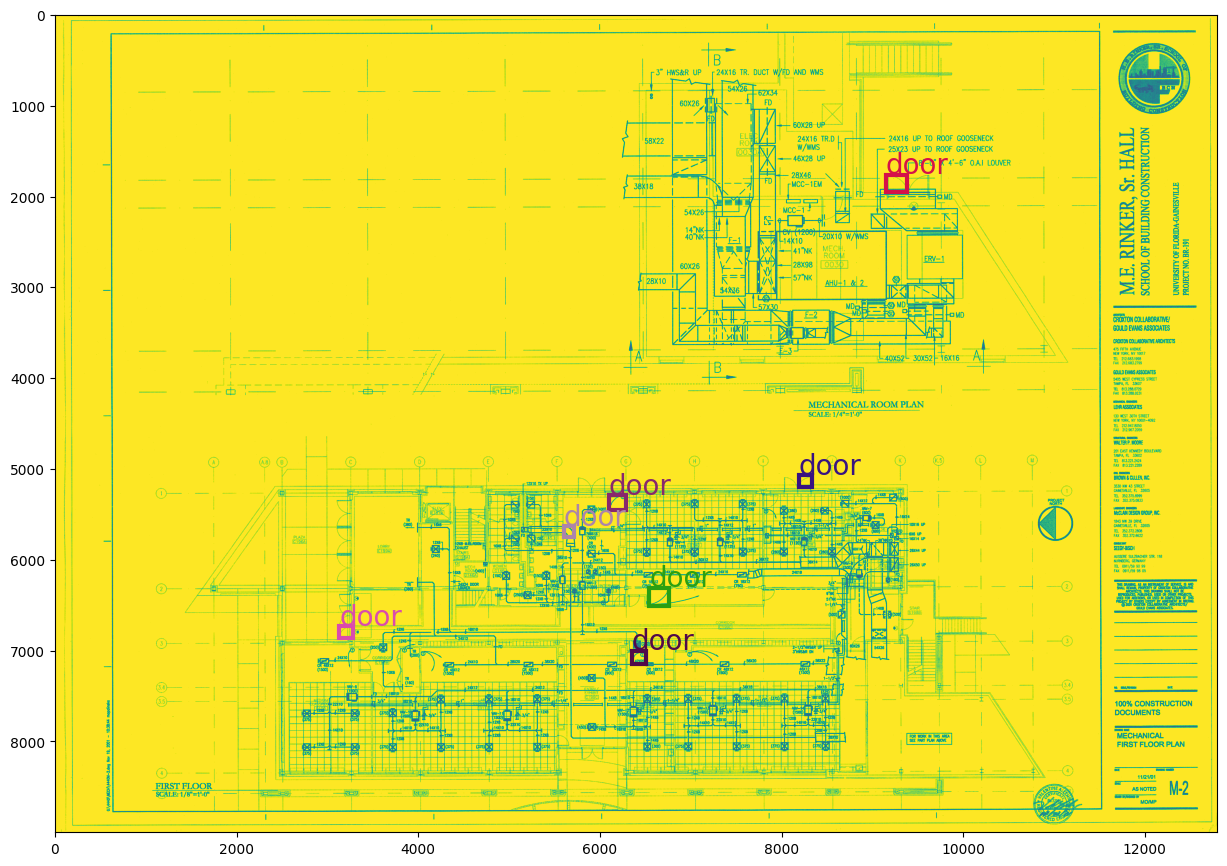

door: [2643.35, 1765.636, 76.409, 103.569], 0.784
door: [3716.889, 2945.602, 185.429, 166.519], 0.812
door: [3148.959, 2394.023, 135.056, 122.993], 0.797
door: [3697.99, 2958.87, 152.972, 107.157], 0.758
door: [5512.687, 2504.402, 136.287, 137.343], 0.661
door: [8691.036, 1420.102, 112.607, 99.773], 0.616
door: [7848.483, 6005.544, 115.526, 110.439], 0.723
door: [8762.504, 7077.614, 215.658, 211.409], 0.835
door: [9235.895, 6516.046, 130.677, 129.75], 0.812
door: [8536.153, 6178.522, 134.001, 132.888], 0.776


<Figure size 1800x1200 with 0 Axes>

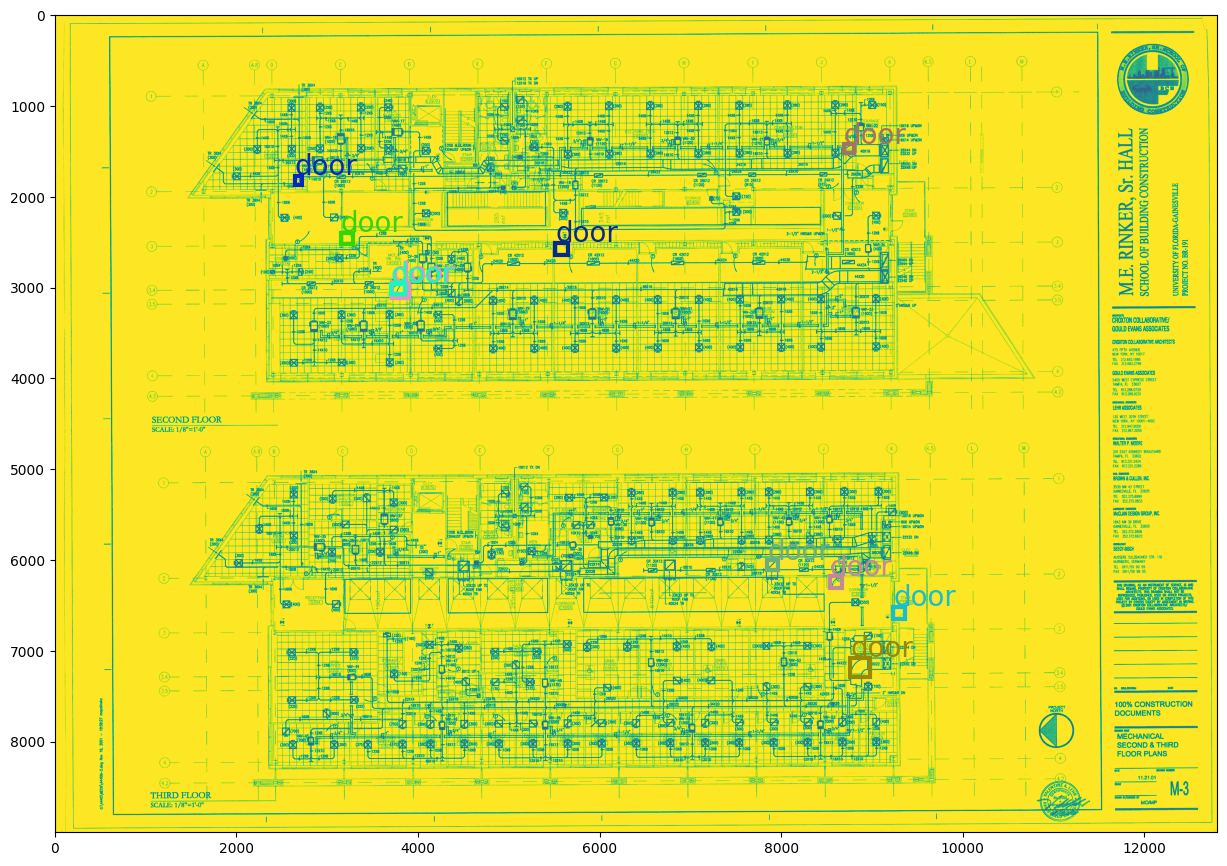

door: [2781.383, 2258.616, 131.838, 122.725], 0.723
door: [3143.071, 2856.287, 127.314, 132.718], 0.619
door: [3004.269, 2462.452, 151.117, 171.098], 0.619
door: [4835.491, 5859.267, 152.739, 153.211], 0.695
door: [4845.656, 5677.569, 136.978, 116.676], 0.884
door: [5423.542, 5810.623, 136.034, 141.45], 0.787
door: [5934.364, 1911.191, 157.103, 152.541], 0.909
door: [6464.595, 2414.005, 146.942, 135.38], 0.809
door: [7432.463, 1857.837, 145.419, 141.321], 0.753
door: [5807.681, 2023.126, 120.631, 129.115], 0.668
door: [5801.692, 1918.155, 129.669, 116.843], 0.636
door: [5032.252, 5687.629, 145.202, 138.646], 0.895
door: [5264.244, 6571.532, 146.581, 156.251], 0.859
door: [8961.791, 2186.032, 150.962, 151.616], 0.662
door: [8324.938, 5996.052, 119.099, 142.142], 0.86


<Figure size 1800x1200 with 0 Axes>

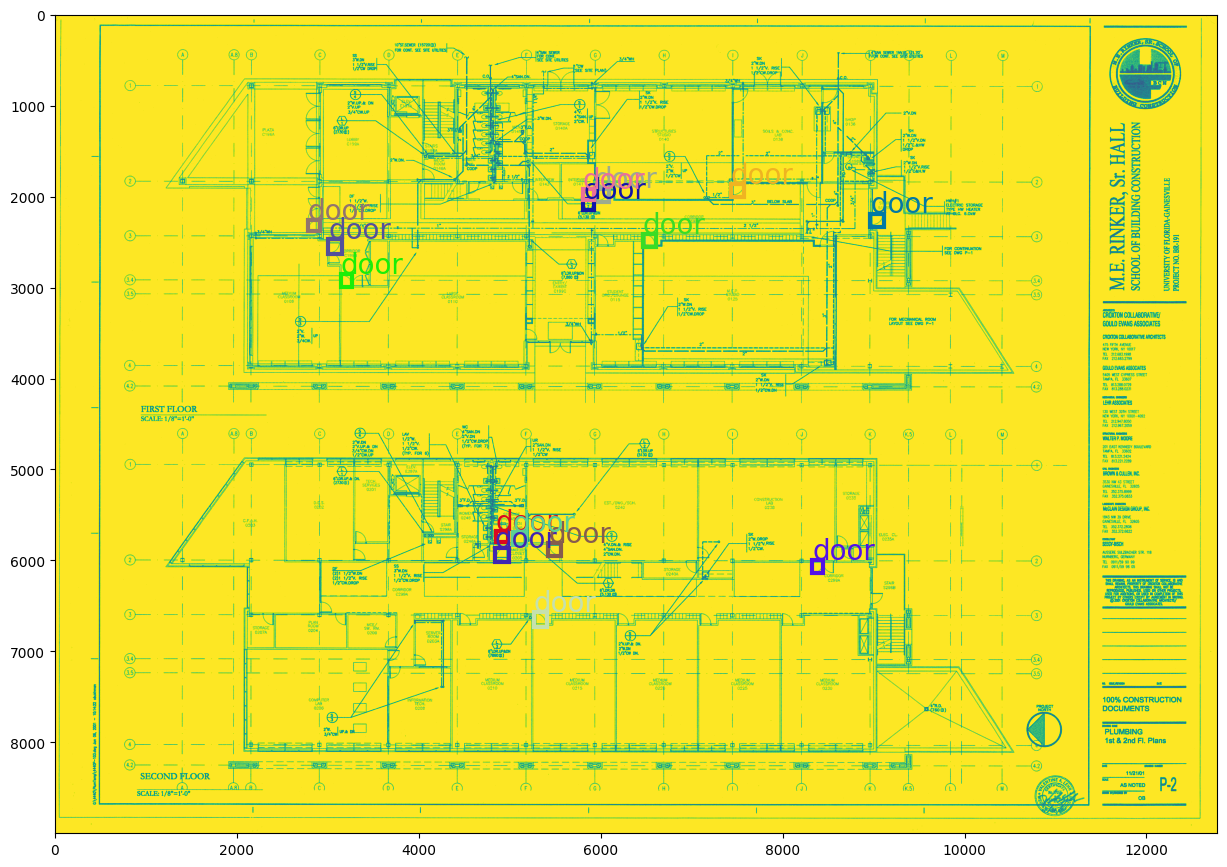

door: [2707.629, 838.062, 155.497, 174.575], 0.929
door: [5157.206, 3423.243, 142.619, 132.099], 0.904
door: [4985.985, 1803.821, 135.671, 147.401], 0.682
door: [3120.278, 2847.786, 137.834, 137.708], 0.911
door: [3257.545, 2849.854, 113.82, 103.526], 0.853
door: [3089.466, 6782.651, 159.475, 142.304], 0.894
door: [4450.176, 6751.494, 145.763, 147.596], 0.767
door: [4862.881, 6036.031, 134.642, 123.056], 0.703
door: [3703.576, 7358.412, 130.86, 146.372], 0.665
door: [2931.12, 6646.648, 144.23, 151.032], 0.609
door: [7395.069, 1785.094, 160.367, 167.386], 0.874
door: [5892.443, 798.052, 179.33, 169.677], 0.833
door: [5929.929, 1873.466, 130.925, 140.857], 0.719
door: [5344.705, 578.432, 176.316, 169.103], 0.637
door: [5051.216, 5863.957, 137.562, 125.863], 0.822
door: [6198.556, 6735.843, 142.483, 147.447], 0.85
door: [5281.355, 6746.983, 152.636, 141.511], 0.811
door: [8345.915, 6139.415, 116.452, 138.741], 0.739


<Figure size 1800x1200 with 0 Axes>

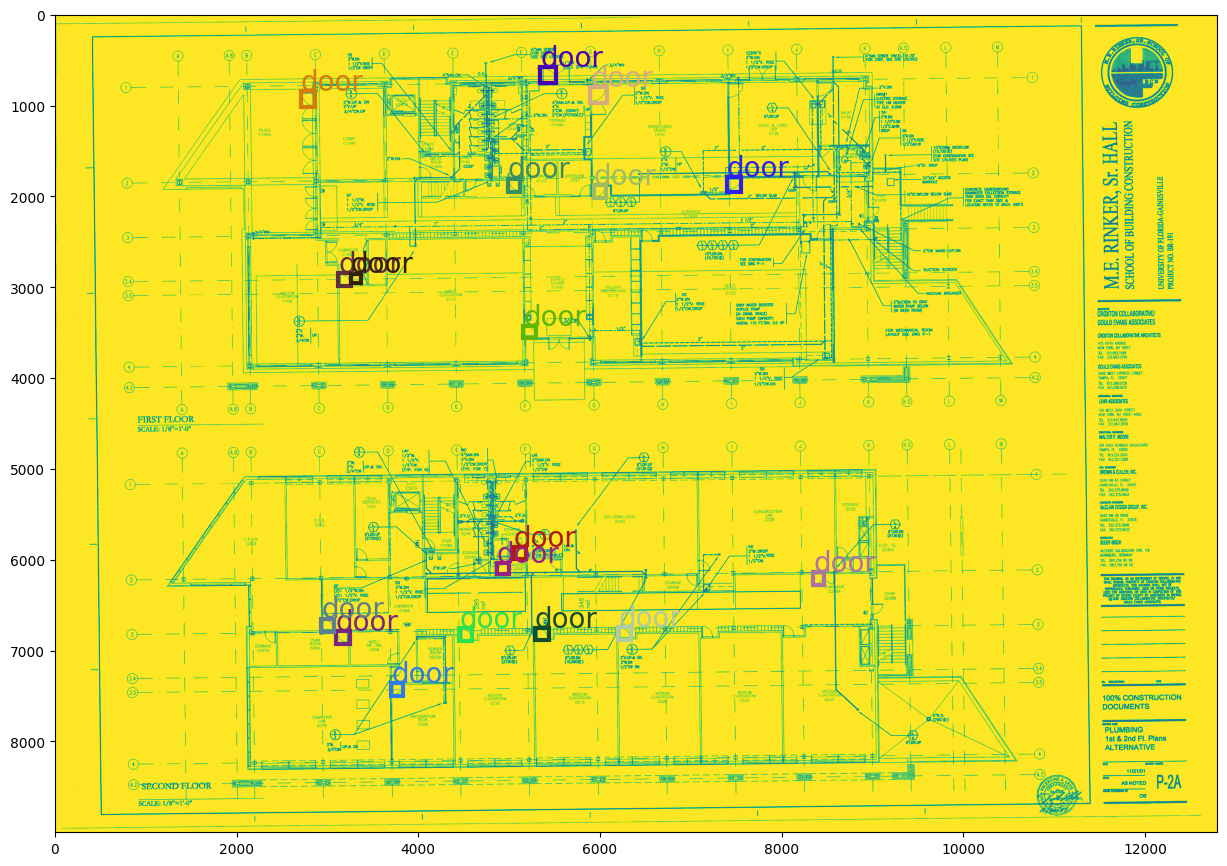

In [33]:
#sample_image = test_image_paths[0]
#detections = json.loads(result)[0]

for img, det in zip(test_image_paths, json.loads(result)):
    visualize_detection(img, det)

# Next Steps
You can see further examples of other AutoML tasks such as Regression, Image-Classification, NLP-Text-Classification, Time-Series-Forcasting, etc.